In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/meduza_dataset_big.csv')

In [34]:
tags = list(set(df["tag"].values))
lst = []
for tag in tags:
    lst.append(df[df["tag"] == tag].iloc[:1000])
df = pd.concat(lst)

X = df["text"]
y = df["tag"] == 'партнерский материал'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from data.data_preprocessor import DataPreprocessor
import matplotlib.pyplot as plt
import umap.umap_ as umap

In [36]:
def vectorize(vectorizer, X_train, X_test):
    preprocessor = DataPreprocessor()
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.fit_transform(X_test)
    vectorizer.fit(X_train)

    bow = vectorizer.transform(X_train)
    bow_test = vectorizer.transform(X_test)

    print(bow.shape)

    scaler = MaxAbsScaler()
    reducer = umap.UMAP(n_neighbors=15, n_components=2)
    embedding = reducer.fit_transform(bow)

    plt.scatter(embedding[:, 0], embedding[:, 1], c=y_train, cmap="bwr")
    plt.title('UMAP Projection of Random Data')
    plt.xlabel('UMAP Feature 1')
    plt.ylabel('UMAP Feature 2')
    plt.legend()
    plt.show()
    return {"train": scaler.fit_transform(bow),
            "test": scaler.transform(bow_test)}


def fit_predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

[nltk_data] Downloading package stopwords to /Library/Frameworks/Pytho
[nltk_data]     n.framework/Versions/3.10/lib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(4137, 892)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


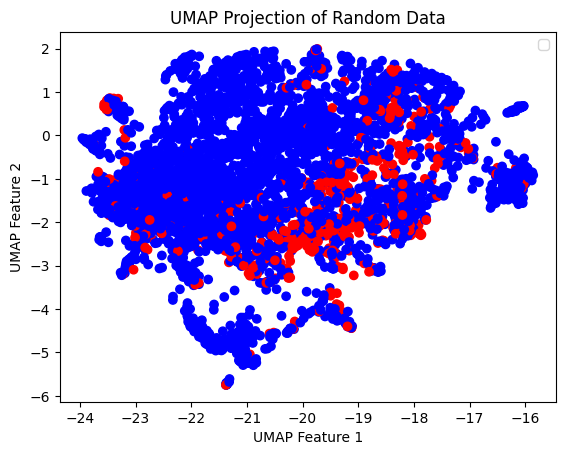

[nltk_data] Downloading package stopwords to /Library/Frameworks/Pytho
[nltk_data]     n.framework/Versions/3.10/lib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(4137, 892)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


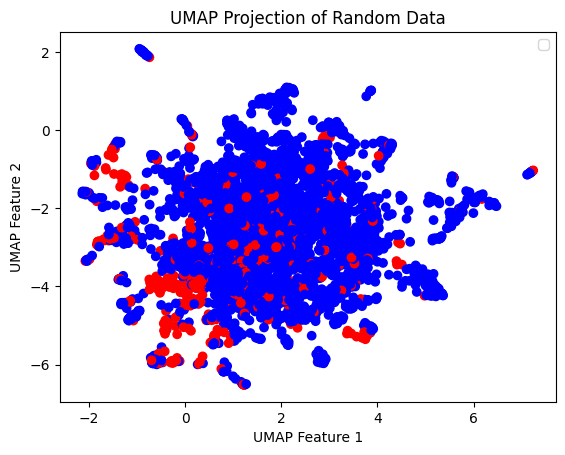

In [38]:
vectorizers = {
    "CountVectorizer": CountVectorizer(ngram_range=(1, 1), min_df=0.05, max_df=0.8),
    "TfidfVectorizer": TfidfVectorizer(ngram_range=(1, 1), min_df=0.05, max_df=0.8),
}

vectorized_data = {vectorizer_name: vectorize(vectorizers[vectorizer_name], X_train, X_test) for vectorizer_name in
                   vectorizers}


In [39]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
    "SVC": SVC(kernel="linear", class_weight='balanced', random_state=42),
    "CatBoostClassifier": CatBoostClassifier(iterations=1000, random_state=42, silent=True),
}

for model_name in models:
    for vectorizer_name in vectorizers:
        print(f"Model : {model_name} \nVectorizer : {vectorizer_name}\n")

        fit_predict(models[model_name], vectorized_data[vectorizer_name]['train'], y_train,
                    vectorized_data[vectorizer_name]['test'], y_test)

Model : LogisticRegression 
Vectorizer : CountVectorizer

              precision    recall  f1-score   support

       False       0.96      0.96      0.96      1162
        True       0.79      0.81      0.80       218

    accuracy                           0.94      1380
   macro avg       0.88      0.88      0.88      1380
weighted avg       0.94      0.94      0.94      1380

Model : LogisticRegression 
Vectorizer : TfidfVectorizer

              precision    recall  f1-score   support

       False       0.98      0.96      0.97      1162
        True       0.79      0.90      0.85       218

    accuracy                           0.95      1380
   macro avg       0.89      0.93      0.91      1380
weighted avg       0.95      0.95      0.95      1380

Model : RandomForestClassifier 
Vectorizer : CountVectorizer

              precision    recall  f1-score   support

       False       0.92      1.00      0.96      1162
        True       0.97      0.55      0.70       218

    